In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sivac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sivac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Load Abusive Language Detection Dataset
df = pd.read_csv('abusive tweets/abusive language detection/Tweets.csv',header=None)

In [61]:
df.columns = ['label', 'tweet']
print(df.columns)

Index(['label', 'tweet'], dtype='object')


In [62]:
df.head()

,label,tweet
0,0,Only among Muslims can one find someone proudl...
1,0,@_sabanaqvi Only among Muslims can one find so...
2,0,"@megha_writes Muslim rapist ?"", ""truncated"": f..."
3,0,@peoplepower @ACLU A Muslim holding a placard ...
4,0,RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...


In [63]:
df.dtypes

label     int64
tweet    object
dtype: object

In [64]:
df.shape

(11805, 2)

In [65]:
df['label'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [66]:
label_0 = (df['label'] == 0).sum()
label_0

2361

In [67]:
label_1 = (df['label'] == 1).sum()
label_1

2361

In [68]:
label_2 = (df['label'] == 2).sum()
label_2

2361

In [69]:
label_3 = (df['label'] == 3).sum()
label_3

2361

In [70]:
label_4 = (df['label'] == 4).sum()
label_4

2361

all the 4 label is distributed equally

Text(0.5, 1.0, 'Negative ')

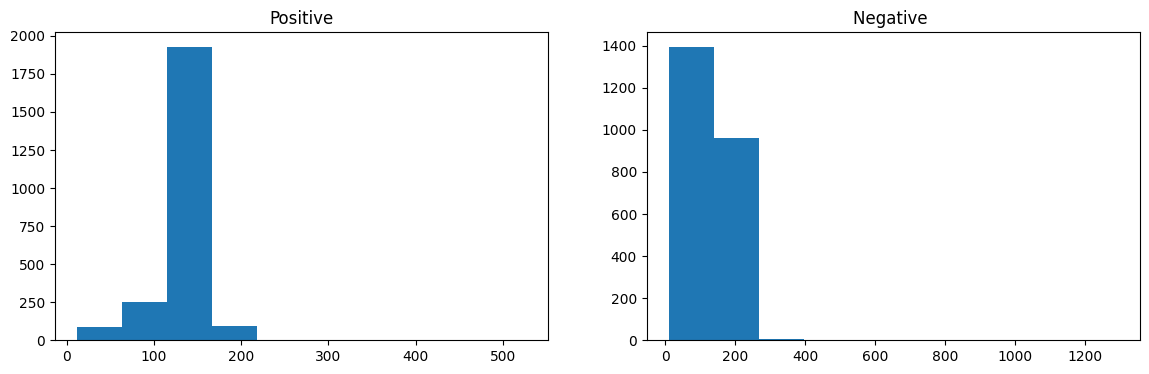

In [71]:
# distribution of review lengths for positive and negative sentiments.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
ax1.hist(df[df['label'] == 0]['tweet'].str.len())
ax1.set_title('Positive')
ax2.hist(df[df['label'] == 4]['tweet'].str.len())
ax2.set_title('Negative ')

# WORD CLOUD

There are 320583 words in the combination of all review.


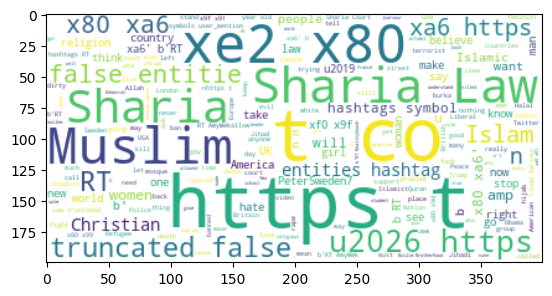

In [72]:
tweet = " ".join(i for i in df[df['label']==0]['tweet'])
print ("There are {} words in the combination of all review.".format(len(tweet)))
wordcloud =WordCloud(max_font_size=58,background_color='white').generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


There are 281836 words in the combination of all review.


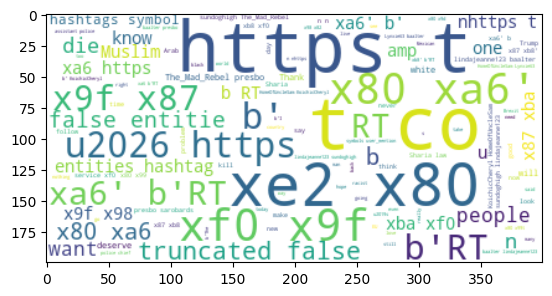

In [73]:
tweet = " ".join(i for i in df[df['label']==4]['tweet'])
print ("There are {} words in the combination of all review.".format(len(tweet)))
wordcloud =WordCloud(max_font_size=58,background_color='white').generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


There are 303650 words in the combination of all review.


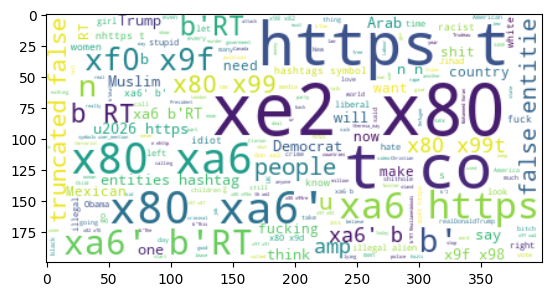

In [74]:
tweet = " ".join(i for i in df[df['label']==1]['tweet'])
print ("There are {} words in the combination of all review.".format(len(tweet)))
wordcloud =WordCloud(max_font_size=58,background_color='white').generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


There are 170966 words in the combination of all review.


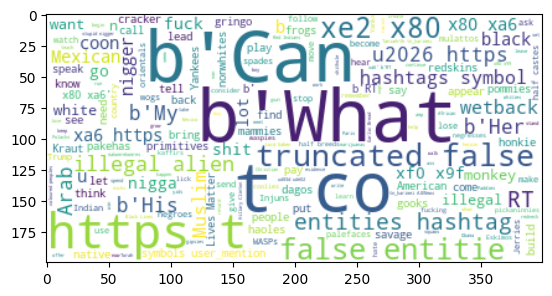

In [75]:
tweet = " ".join(i for i in df[df['label']==2]['tweet'])
print ("There are {} words in the combination of all review.".format(len(tweet)))
wordcloud =WordCloud(max_font_size=58,background_color='white').generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


There are 338890 words in the combination of all review.


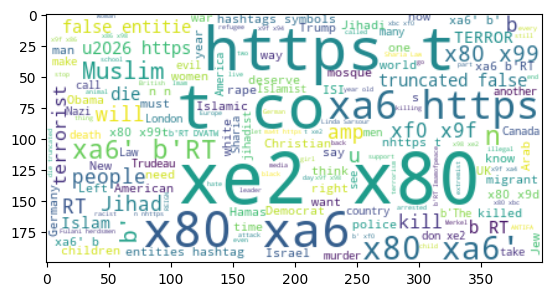

In [76]:
tweet = " ".join(i for i in df[df['label']==3]['tweet'])
print ("There are {} words in the combination of all review.".format(len(tweet)))
wordcloud =WordCloud(max_font_size=58,background_color='white').generate(tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


# Text Preprocessing

In [77]:
def cleaning_text(tweet):
    tweet = tweet.lower() # converting to lowercase
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet) # removing URL links
    tweet = re.sub(r"\b\d+\b", "", tweet) # removing number 
    tweet = re.sub('<.*?>+', '', tweet) # removing special characters, 
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # punctuations
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('[’“”…]', '', tweet)
    tweet=re.sub("isn't",'is not',tweet)
    tweet=re.sub("he's",'he is',tweet)
    tweet=re.sub("wasn't",'was not',tweet)
    tweet=re.sub("there's",'there is',tweet)
    tweet=re.sub("couldn't",'could not',tweet)
    tweet=re.sub("won't",'will not',tweet)
    tweet=re.sub("they're",'they are',tweet)
    tweet=re.sub("she's",'she is',tweet)
    tweet=re.sub("There's",'there is',tweet)
    tweet=re.sub("wouldn't",'would not',tweet)
    tweet=re.sub("haven't",'have not',tweet)
    tweet=re.sub("That's",'That is',tweet)
    tweet=re.sub("you've",'you have',tweet)
    tweet=re.sub("He's",'He is',tweet)
    tweet=re.sub("what's",'what is',tweet)
    tweet=re.sub("weren't",'were not',tweet)
    tweet=re.sub("we're",'we are',tweet)
    tweet=re.sub("hasn't",'has not',tweet)
    tweet=re.sub("you'd",'you would',tweet)
    tweet=re.sub("shouldn't",'should not',tweet)
    tweet=re.sub("let's",'let us',tweet)
    tweet=re.sub("they've",'they have',tweet)
    tweet=re.sub("You'll",'You will',tweet)
    tweet=re.sub("i'm",'i am',tweet)
    tweet=re.sub("we've",'we have',tweet)
    tweet=re.sub("it's",'it is',tweet)
    tweet=re.sub("don't",'do not',tweet)
    tweet=re.sub("that´s",'that is',tweet)
    tweet=re.sub("I´m",'I am',tweet)
    tweet=re.sub("it’s",'it is',tweet)
    tweet=re.sub("she´s",'she is',tweet)
    tweet=re.sub("he’s'",'he is',tweet)
    tweet=re.sub('I’m','I am',tweet)
    tweet=re.sub('I’d','I did',tweet)
    tweet=re.sub("he’s'",'he is',tweet)
    tweet=re.sub('there’s','there is',tweet)
    
    return tweet
    
clean_df = df['tweet'].apply(cleaning_text)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\sivac\AppData\Local\Temp\ipykernel_21064\3555235330.py:3: SyntaxWarning: invalid escape sequence '\S'
  tweet = re.sub('https?://\S+|www\.\S+', '', tweet) # removing URL links


In [78]:
clean_df

0        only among muslims can one find someone proudl...
1        sabanaqvi only among muslims can one find some...
2        meghawrites muslim rapist  truncated false ent...
3        peoplepower aclu a muslim holding a placard pe...
4        rt padban bohemians pc home to afa thugs and a...
                               ...                        
11800    bhalewoodmike tookenglandback wont offend them...
11801            brt halewoodmike doesnt it make you sick 
11802    brt ukfollowgain the twitter police have obvio...
11803    brt whitford747 regarding tommyrobinsons ban o...
11804    brt prisonplanet the thought police have final...
Name: tweet, Length: 11805, dtype: object

In [79]:
clean_df = pd.DataFrame(clean_df)  
clean_df['label']=df['label']
print(clean_df.columns,"\n")
clean_df.head()

Index(['tweet', 'label'], dtype='object') 



,tweet,label
0,only among muslims can one find someone proudl...,0
1,sabanaqvi only among muslims can one find some...,0
2,meghawrites muslim rapist truncated false ent...,0
3,peoplepower aclu a muslim holding a placard pe...,0
4,rt padban bohemians pc home to afa thugs and a...,0


In [80]:
clean_df['tweet'] = clean_df['tweet'].astype(str)
stop_words = set(stopwords.words('english'))
clean_df['no_stop_word']=clean_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [81]:
clean_df

,tweet,label,no_stop_word
0,only among muslims can one find someone proudl...,0,among muslims one find someone proudly cooing ...
1,sabanaqvi only among muslims can one find some...,0,sabanaqvi among muslims one find someone proud...
2,meghawrites muslim rapist truncated false ent...,0,meghawrites muslim rapist truncated false enti...
3,peoplepower aclu a muslim holding a placard pe...,0,peoplepower aclu muslim holding placard perhap...
4,rt padban bohemians pc home to afa thugs and a...,0,rt padban bohemians pc home afa thugs african ...
...,...,...,...
11800,bhalewoodmike tookenglandback wont offend them...,4,bhalewoodmike tookenglandback wont offend much...
11801,brt halewoodmike doesnt it make you sick,4,brt halewoodmike doesnt make sick
11802,brt ukfollowgain the twitter police have obvio...,4,brt ukfollowgain twitter police obviously stop...
11803,brt whitford747 regarding tommyrobinsons ban o...,4,brt whitford747 regarding tommyrobinsons ban t...


In [82]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in clean_df['no_stop_word'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,brt,2498
1,rt,1354
2,sharia,1189
3,truncated,1176
4,false,1052
5,entities,866
6,muslim,716
7,law,660
8,hashtags,655
9,bwhat,581


In [83]:
most_common = cnt.most_common(30)
most_common_words = {word for word, count in most_common}
def remove_most_frequent_words(text):
    return " ".join([word for word in str(text).split() if word not in most_common_words])

# Apply the function to remove the most frequent words
clean_df['without_most_frequent'] = clean_df['no_stop_word'].apply(remove_most_frequent_words)

In [84]:
clean_df

,tweet,label,no_stop_word,without_most_frequent
0,only among muslims can one find someone proudl...,0,among muslims one find someone proudly cooing ...,among find someone proudly cooing rapist murde...
1,sabanaqvi only among muslims can one find some...,0,sabanaqvi among muslims one find someone proud...,sabanaqvi among find someone proudly cooing ra...
2,meghawrites muslim rapist truncated false ent...,0,meghawrites muslim rapist truncated false enti...,meghawrites rapist usermentions screenname meg...
3,peoplepower aclu a muslim holding a placard pe...,0,peoplepower aclu muslim holding placard perhap...,peoplepower aclu holding placard perhaps illeg...
4,rt padban bohemians pc home to afa thugs and a...,0,rt padban bohemians pc home afa thugs african ...,padban bohemians pc home afa thugs african pla...
...,...,...,...,...
11800,bhalewoodmike tookenglandback wont offend them...,4,bhalewoodmike tookenglandback wont offend much...,bhalewoodmike tookenglandback wont offend much...
11801,brt halewoodmike doesnt it make you sick,4,brt halewoodmike doesnt make sick,halewoodmike doesnt make sick
11802,brt ukfollowgain the twitter police have obvio...,4,brt ukfollowgain twitter police obviously stop...,ukfollowgain twitter police obviously stopped ...
11803,brt whitford747 regarding tommyrobinsons ban o...,4,brt whitford747 regarding tommyrobinsons ban t...,whitford747 regarding tommyrobinsons ban twitt...


In [85]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in clean_df['without_most_frequent'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(15))
temp.columns=['word', 'count']
temp

,word,count
0,die,263
1,white,254
2,islamic,244
3,trump,229
4,country,222
5,kill,215
6,go,209
7,black,206
8,police,192
9,alien,191


# Lemmatization

In [86]:
wordnet_lem = WordNetLemmatizer()
clean_df['lemma_done'] = clean_df['without_most_frequent'].apply(wordnet_lem.lemmatize)
clean_df.head()

,tweet,label,no_stop_word,without_most_frequent,lemma_done
0,only among muslims can one find someone proudl...,0,among muslims one find someone proudly cooing ...,among find someone proudly cooing rapist murde...,among find someone proudly cooing rapist murde...
1,sabanaqvi only among muslims can one find some...,0,sabanaqvi among muslims one find someone proud...,sabanaqvi among find someone proudly cooing ra...,sabanaqvi among find someone proudly cooing ra...
2,meghawrites muslim rapist truncated false ent...,0,meghawrites muslim rapist truncated false enti...,meghawrites rapist usermentions screenname meg...,meghawrites rapist usermentions screenname meg...
3,peoplepower aclu a muslim holding a placard pe...,0,peoplepower aclu muslim holding placard perhap...,peoplepower aclu holding placard perhaps illeg...,peoplepower aclu holding placard perhaps illeg...
4,rt padban bohemians pc home to afa thugs and a...,0,rt padban bohemians pc home afa thugs african ...,padban bohemians pc home afa thugs african pla...,padban bohemians pc home afa thugs african pla...


# TOKENIZATION

In [87]:
final_df =clean_df.drop(columns=['tweet','no_stop_word','without_most_frequent'])
final_df.columns = ['label','tweet']
print(final_df.columns)
print(final_df.head())
final_df['label'].unique()

Index(['label', 'tweet'], dtype='object')
   label                                              tweet
0      0  among find someone proudly cooing rapist murde...
1      0  sabanaqvi among find someone proudly cooing ra...
2      0  meghawrites rapist usermentions screenname meg...
3      0  peoplepower aclu holding placard perhaps illeg...
4      0  padban bohemians pc home afa thugs african pla...


array([0, 1, 2, 3, 4], dtype=int64)

In [88]:
final_df.isnull().sum()

label    0
tweet    0
dtype: int64

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(final_df['tweet'])

c:\Users\sivac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [91]:
text_counts

<11805x24850 sparse matrix of type '<class 'numpy.int64'>'
	with 96501 stored elements in Compressed Sparse Row format>

# SPLIT TRAIN & TEST

In [92]:
from sklearn.model_selection import train_test_split
x = text_counts
y = final_df['label']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [93]:
print("\n=== Logistic Regression ===")

# Initialize Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_pred[:5]


=== Logistic Regression ===


array([1, 0, 4, 2, 3], dtype=int64)

In [95]:
# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)

# Display cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
# Model evaluation
accuracy = accuracy_score(ytest, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(ytest, y_pred))



Cross-validation scores: [0.41338416 0.53706057 0.60736976 0.53155443 0.45362135]
Mean cross-validation score: 0.50859805167302

Accuracy: 0.6632782719186785

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       478
           1       0.56      0.56      0.56       474
           2       0.90      0.85      0.88       480
           3       0.66      0.66      0.66       461
           4       0.59      0.64      0.61       468

    accuracy                           0.66      2361
   macro avg       0.67      0.66      0.66      2361
weighted avg       0.67      0.66      0.66      2361



In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
nb_model = MultinomialNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_model, x, y, cv=5)
print("\n=== Naive Bayes (MultinomialNB) ===")
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


=== Naive Bayes (MultinomialNB) ===
Cross-validation scores: [0.40025413 0.52350699 0.59212198 0.50698856 0.41041931]
Mean cross-validation score: 0.48665819567979673


In [97]:
# Train the model
nb_model.fit(xtrain, ytrain)

MultinomialNB()

In [99]:

# Predictions
y_pred = nb_model.predict(xtest)

# Model evaluation
accuracy = accuracy_score(ytest, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(ytest, y_pred))



Accuracy: 0.6310885218127912

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       478
           1       0.53      0.55      0.54       474
           2       0.77      0.85      0.81       480
           3       0.58      0.71      0.64       461
           4       0.68      0.44      0.54       468

    accuracy                           0.63      2361
   macro avg       0.63      0.63      0.63      2361
weighted avg       0.63      0.63      0.63      2361



In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
svm_model = SVC(probability=True)

# Perform cross-validation
cv_scores = cross_val_score(svm_model, x, y, cv=5)
print("\n=== Support Vector Machine (SVM) ===")
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



=== Support Vector Machine (SVM) ===
Cross-validation scores: [0.3854299  0.51884795 0.62177044 0.54510801 0.45955104]
Mean cross-validation score: 0.5061414654807285


In [101]:
# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6302414231257941

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59       478
           1       0.51      0.55      0.53       474
           2       0.96      0.79      0.87       480
           3       0.56      0.70      0.62       461
           4       0.57      0.56      0.56       468

    accuracy                           0.63      2361
   macro avg       0.65      0.63      0.63      2361
weighted avg       0.65      0.63      0.63      2361

